# Key Indicators of Heart Disease

## About dataset:

>The Personal Key Indicators of Heart Disease dataset contains 320K rows and 18 columns. It is version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

>Below is a description of the features collected for each patient:

In [256]:
#1-HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
#2-BMI : Body Mass Index (BMI).
#3-Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
#4-AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
#5-Stroke : (Ever told) (you had) a stroke?
#6-PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
#7-MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
#8-DiffWalking : Do you have serious difficulty walking or climbing stairs?
#9-Sex : Are you male or female?
#10-AgeCategory: Fourteen-level age category.
#11-Race : Imputed race/ethnicity value.
#12-Diabetic : (Ever told) (you had) diabetes?
#13-PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
#14-GenHealth : Would you say that in general your health is...
#15-SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
#16-Asthma : (Ever told) (you had) asthma?
#17-KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
#18-SkinCancer : (Ever told) (you had) skin cancer?

## Defining the important question

>1-What factor has the most impact on a person's health and chance of getting a Heart Disease?

>2-Do all factors affect badly on a person with a HeartDisease?

>3-does following a healthy-lifestyle really reduces the chance of getting a Heart_Disease?

### import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datasist.structdata import detect_outliers
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Reading the dataset

In [2]:
df=pd.read_csv("E:\Epsilon AI course\project\heart disease\heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

#### Dimension of the dataset

In [3]:
df.shape

(319795, 18)

#### information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

>Changing columns' names

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df.rename(columns={'HeartDisease':'Heart_Disease','AlcoholDrinking':'Alcohol_Drinking','PhysicalHealth':'Physical_Health',
                   'MentalHealth':'Mental_Health','DiffWalking':'Diff_Walking','AgeCategory':'Age_Category',
                   'PhysicalActivity':'Physical_Activity','GenHealth':'Gen_Health',
                   'SleepTime':'Sleep_Time','KidneyDisease':'Kidney_Disease','SkinCancer':'Skin_Cancer'},inplace=True)
df.head(3)

Heart_Disease    BMI Smoking Alcohol_Drinking Stroke  Physical_Health  \
0            No  16.60     Yes               No     No              3.0   
1            No  20.34      No               No    Yes              0.0   
2            No  26.58     Yes               No     No             20.0   

   Mental_Health Diff_Walking     Sex Age_Category   Race Diabetic  \
0           30.0           No  Female        55-59  White      Yes   
1            0.0           No  Female  80 or older  White       No   
2           30.0           No    Male        65-69  White      Yes   

  Physical_Activity Gen_Health  Sleep_Time Asthma Kidney_Disease Skin_Cancer  
0               Yes  Very good         5.0    Yes             No         Yes  
1               Yes  Very good         7.0     No             No          No  
2               Yes       Fair         8.0    Yes             No          No

>Check the null values

In [7]:
df.isnull().sum()

Heart_Disease        0
BMI                  0
Smoking              0
Alcohol_Drinking     0
Stroke               0
Physical_Health      0
Mental_Health        0
Diff_Walking         0
Sex                  0
Age_Category         0
Race                 0
Diabetic             0
Physical_Activity    0
Gen_Health           0
Sleep_Time           0
Asthma               0
Kidney_Disease       0
Skin_Cancer          0
dtype: int64

>Checking the Duplicate values

In [8]:
df.duplicated().sum()

18078

In [9]:
#Drop the duplicate data
df.drop_duplicates(subset=None,keep=False,inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(289865, 18)

>Describe numerical value

In [12]:
numerical=df.select_dtypes(exclude='object')
numerical.describe()

BMI  Physical_Health  Mental_Health     Sleep_Time
count  289865.000000    289865.000000  289865.000000  289865.000000
mean       28.521254         3.717099       4.279499       7.076349
std         6.542182         8.271924       8.246458       1.488499
min        12.020000         0.000000       0.000000       1.000000
25%        24.030000         0.000000       0.000000       6.000000
50%        27.440000         0.000000       0.000000       7.000000
75%        31.870000         2.000000       4.000000       8.000000
max        94.850000        30.000000      30.000000      24.000000

>Describe categorical value

In [13]:
categorical=df.select_dtypes(include='object')
categorical.describe()

Heart_Disease Smoking Alcohol_Drinking  Stroke Diff_Walking     Sex  \
count         289865  289865           289865  289865       289865  289865   
unique             2       2                2       2            2       2   
top               No      No               No      No           No  Female   
freq          262709  165811           268470  277806       245562  154249   

       Age_Category    Race Diabetic Physical_Activity Gen_Health  Asthma  \
count        289865  289865   289865            289865     289865  289865   
unique           13       6        4                 2          5       2   
top           65-69   White       No               Yes  Very good      No   
freq          30145  216436   240152            219063      98985  247410   

       Kidney_Disease Skin_Cancer  
count          289865      289865  
unique              2           2  
top                No          No  
freq           278092      261038

>> The Outliers

In [14]:
list(numerical)

['BMI', 'Physical_Health', 'Mental_Health', 'Sleep_Time']

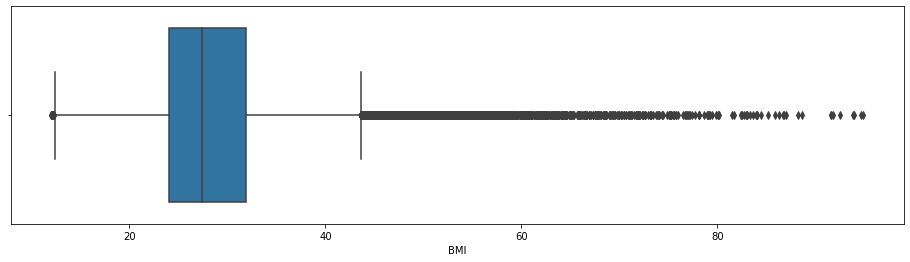

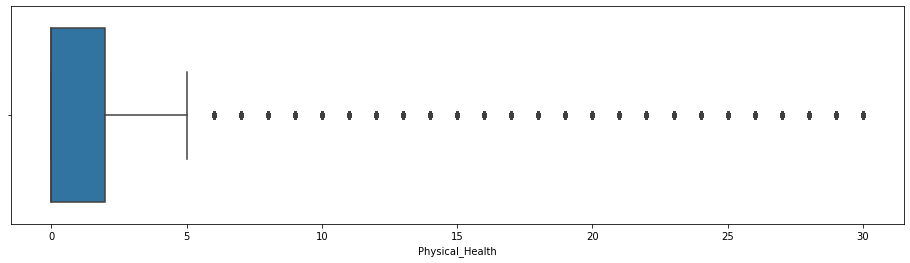

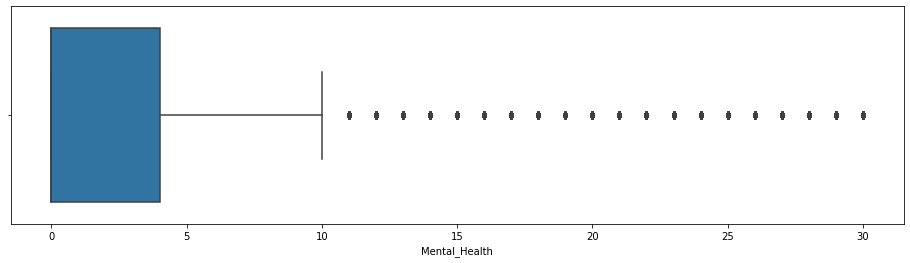

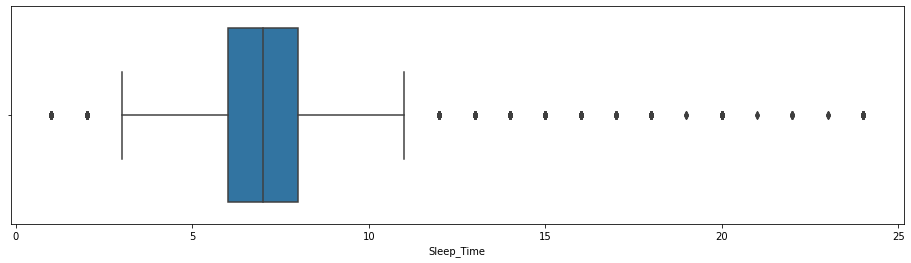

In [15]:
for i in list(numerical):
    fig, (ax1) = plt.subplots(nrows=1, figsize=(16, 4))
    sns.boxplot(data=df, x=i, ax=ax1)

In [16]:
for i in list(numerical):
    Q1, Q3 = df[i].quantile([0.25,0.75])
    IQR = Q3 - Q1
    right = Q3 + 1.5 * IQR
    left = Q1 - 1.5 * IQR
    n = len(df.loc[(df[i] < left) | (df[i] > right)])
    print(f"{i}:\n outlier Num = {n}\n outlier Percentage = {n*100/len(df):.2f}%\n")

BMI:
 outlier Num = 8158
 outlier Percentage = 2.81%

Physical_Health:
 outlier Num = 47126
 outlier Percentage = 16.26%

Mental_Health:
 outlier Num = 39660
 outlier Percentage = 13.68%

Sleep_Time:
 outlier Num = 4541
 outlier Percentage = 1.57%



>Eliminating Outliers with Z-Scores

In [17]:
#calculating z-score
#def handle_outliers:
    #zscore= (df[col]- df[col].mean())/df[col].std(ddof=0)
    #return(abs(df['zscore']) > 3).astype(int)
    
num_of_cols=numerical.columns[1:]
d=df.copy()
for i in num_of_cols:
    d[i]=zscore(d[i])
outscores = np.abs(d[num_of_cols])
no_outliers = (outscores<=3.3).all(axis=1)
df2 = df[no_outliers]        

In [18]:
for i in list(numerical):
    Q1, Q3 = df2[i].quantile([0.25,0.75])
    IQR = Q3 - Q1
    right = Q3 + 1.5 * IQR
    left = Q1 - 1.5 * IQR
    n = len(df2.loc[(df2[i] < left) | (df2[i] > right)])
    print(f"{i}:\n outlier Num = {n}\n outlier Percentage = {n*100/len(df2):.2f}%\n")

BMI:
 outlier Num = 8143
 outlier Percentage = 2.85%

Physical_Health:
 outlier Num = 45497
 outlier Percentage = 15.95%

Mental_Health:
 outlier Num = 38421
 outlier Percentage = 13.47%

Sleep_Time:
 outlier Num = 0
 outlier Percentage = 0.00%



In [19]:
df2.shape

(285324, 18)

## EDA

>General quistions with visualization of the data

>>1- What is the total percentage of heart disease patients in our dataset?

In [20]:
df2['Heart_Disease'].value_counts()

No     258940
Yes     26384
Name: Heart_Disease, dtype: int64

In [21]:
percentage_heart_disease = (df2.groupby('Heart_Disease').size()*100 / len(df2)).to_dict()
percentage_heart_disease

{'No': 90.7529685550462, 'Yes': 9.247031444953807}

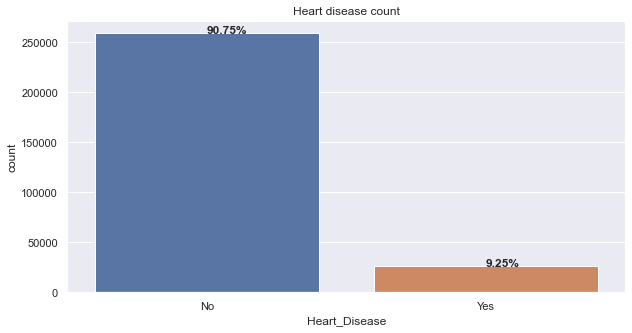

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Heart disease count')
ax=sns.countplot(data=df2,x='Heart_Disease',order=df2['Heart_Disease'].value_counts().index)
for y in ax.patches:
        height=y.get_height()
        width=y.get_width()
        percent=height/len(df2)
        ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

In [23]:
fig = px.pie(values=df2['Heart_Disease'].value_counts(), names=df2['Heart_Disease'].value_counts().index)
fig.show()

>We can notice that most people in our data set do not have heart disease (Approximately 9 in 100 people suffer from heart disease)

>>2-What are the distributions of our features?

In [24]:
print(f'Numerical columns: {numerical.columns}')
print('-'*80)
print(f'Categorical columns: {categorical.columns[1:]}')

Numerical columns: Index(['BMI', 'Physical_Health', 'Mental_Health', 'Sleep_Time'], dtype='object')
--------------------------------------------------------------------------------
Categorical columns: Index(['Smoking', 'Alcohol_Drinking', 'Stroke', 'Diff_Walking', 'Sex',
       'Age_Category', 'Race', 'Diabetic', 'Physical_Activity', 'Gen_Health',
       'Asthma', 'Kidney_Disease', 'Skin_Cancer'],
      dtype='object')


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Physical_Health'}>],
       [<AxesSubplot:title={'center':'Mental_Health'}>,
        <AxesSubplot:title={'center':'Sleep_Time'}>]], dtype=object)

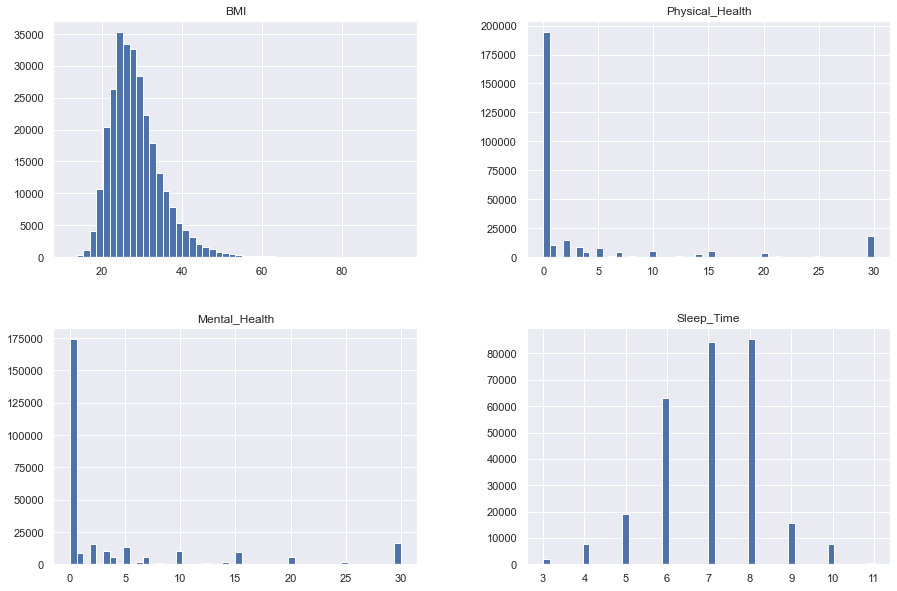

In [25]:
# Distribution of numeric value
df2.hist(figsize=(15,10),bins=50)

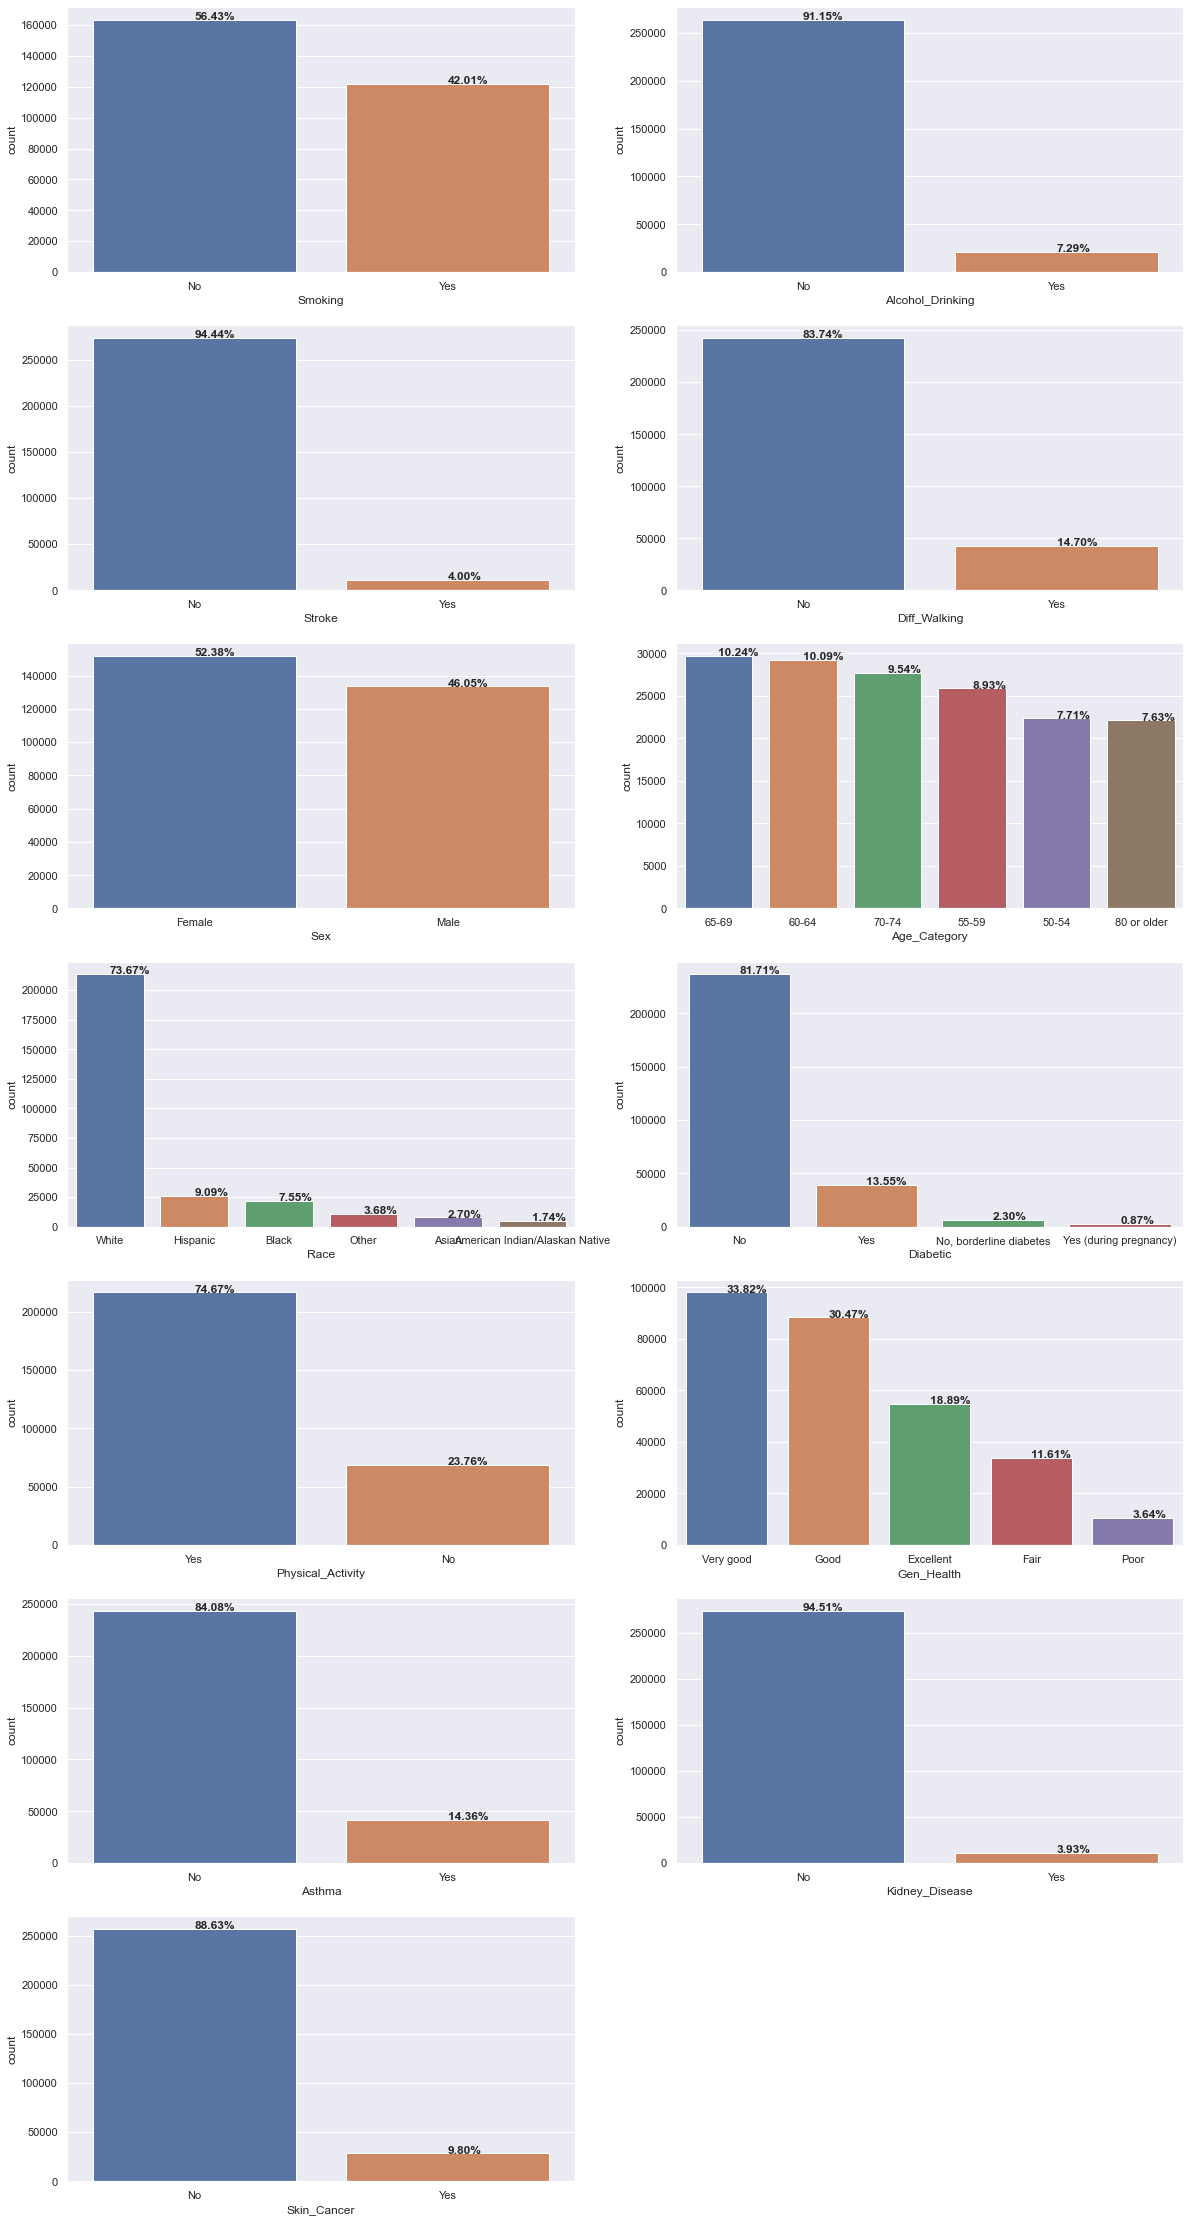

In [26]:
sns.set(rc={'figure.figsize':(20,40)})
cat_cols=categorical.columns[1:]
for i in range(len(cat_cols)):
    plt.subplot(7, 2, i+1) #figure has 7 row, 2 columns.
    ax = sns.countplot(data=df2, x=cat_cols[i],  order=df2[cat_cols[i]].value_counts().index[:6])
  
    for y in ax.patches:
        height=y.get_height()
        width=y.get_width()
        percent=height/len(df)
        
        ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

## Insights from above plots:

>Most people in our data are white..
>>Most people are not Alcohol Drinking.
>>>Most of them don't suffer from difficult walk, had a stroke, diabetic, skin cancer, kidney disease, or asthma.
>>>>Most of them had done a physical activity during the past 30 days other than their regular job.
>>>>>A few of people who said that they have generally a poor health. 
>>>>>>The percentage of smokers in the dataset is high.
>>>>>>>The percentage of males is slightly lower than that of women. 

>Number of unique value of Numeric value

In [27]:
print(f"Number of unique values in BMI :{len(df2.BMI.value_counts())}")
print(f"Number of unique values in Physcial Health :{len(df2.Physical_Health.value_counts())}")
print(f"Number of unique values in Menatl Health :{len(df2.Mental_Health.value_counts())}")
print(f"Number of unique values in Sleep Time :{len(df2.Sleep_Time.value_counts())}")

Number of unique values in BMI :3572
Number of unique values in Physcial Health :31
Number of unique values in Menatl Health :31
Number of unique values in Sleep Time :9


>we notice that the most unique value is BMI

>What is the factors that can impact the person to have heart disease?

In [28]:
#1-BMI
#Body mass index is a value derived from the mass and height of a person. 
#The BMI is defined as the body mass divided by the square of the body height
#Binning BMI for better insights
df2['BMI']

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319789    22.22
319790    27.41
319791    29.84
319792    24.24
319794    46.56
Name: BMI, Length: 285324, dtype: float64

In [29]:
df2['BMI'].sort_values(ascending=True)

205511    12.02
69662     12.02
113373    12.08
51637     12.13
81754     12.16
          ...  
156093    92.53
249715    93.86
104267    93.97
242834    94.66
126896    94.85
Name: BMI, Length: 285324, dtype: float64

In [30]:
df2.groupby('Heart_Disease')['BMI'].mean()

Heart_Disease
No     28.416472
Yes    29.404378
Name: BMI, dtype: float64

>For better understanding BMI values in our dataset we will define it as a relation with Weight
https://www.cdc.gov/healthyweight/assessing/index.html

In [31]:
BMIs=[0,18.5,25,30,35,np.inf]
weight_cat=['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 
         'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df2['BMI_Category'] = pd.cut(df2['BMI'], BMIs, labels=weight_cat)

C:\Users\danac\AppData\Local\Temp\ipykernel_10040\4196877735.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df2.groupby('Heart_Disease')['BMI_Category'].value_counts() 

Heart_Disease                                    
No             Overweight (25.0 <= BMI < 30.0)       88731
               Normal weight (18.5 <= BMI < 25.0)    79569
               Obese (30.0 <= BMI < 35.0)            50474
               Extremly Obese (BMI >= 35.0)          35596
               Underweight (BMI < 18.5)               4570
Yes            Overweight (25.0 <= BMI < 30.0)        9610
               Normal weight (18.5 <= BMI < 25.0)     6121
               Obese (30.0 <= BMI < 35.0)             5940
               Extremly Obese (BMI >= 35.0)           4336
               Underweight (BMI < 18.5)                377
Name: BMI_Category, dtype: int64

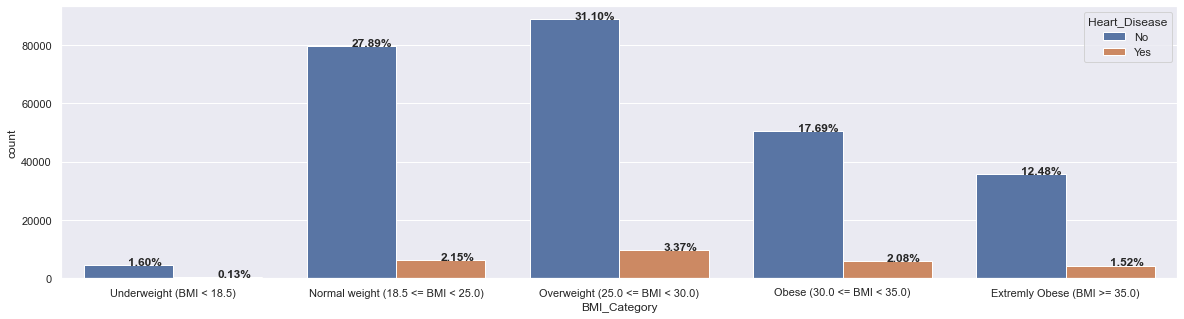

In [33]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df2,x='BMI_Category',hue='Heart_Disease')
for y in ax.patches:
    height=y.get_height()
    width=y.get_width()
    percent=height/len(df2)
    ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

>So, from this chart we notice that managing the weight of the body maybe affect on having heart disease or not.

>Drop BMI column

In [34]:
df2.drop('BMI',axis=1,inplace=True)

C:\Users\danac\AppData\Local\Temp\ipykernel_10040\1347802607.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
#2-Physical_Activity
#Question:for how many days during the past 30 days was your physical health not good? (0-30 days).
df2['Physical_Health']

0          3.0
1          0.0
2         20.0
3          0.0
4         28.0
          ... 
319789     0.0
319790     7.0
319791     0.0
319792     0.0
319794     0.0
Name: Physical_Health, Length: 285324, dtype: float64

In [36]:
df2.groupby('Heart_Disease')['Physical_Health'].mean()

Heart_Disease
No     3.223415
Yes    7.682800
Name: Physical_Health, dtype: float64

In [37]:
df2['Physical_Health'].unique()

array([ 3.,  0., 20., 28., 15.,  5.,  7.,  1.,  2., 30., 21.,  4., 10.,
        6., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [38]:
df2['Physical_Health'].unique().sum()

465.0

In [39]:
df2.groupby('Heart_Disease')['Physical_Health'].value_counts()

Heart_Disease  Physical_Health
No             0.0                180533
               30.0                14232
               2.0                 13516
               1.0                  9740
               3.0                  7664
                                   ...  
Yes            23.0                   11
               26.0                   11
               13.0                   10
               11.0                    9
               19.0                    9
Name: Physical_Health, Length: 62, dtype: int64

Text(0.5, 1.0, 'Physical health to the heart disease')

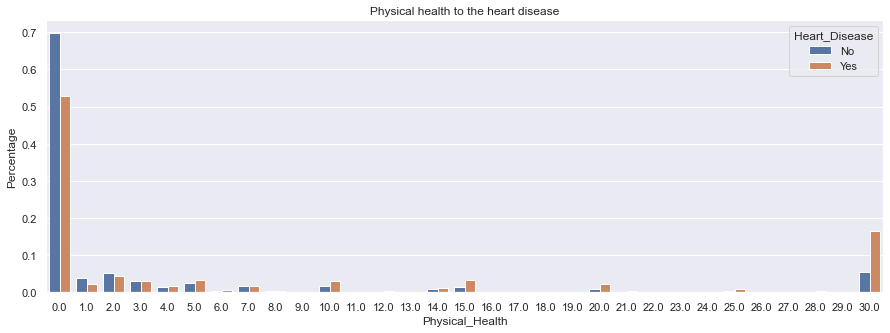

In [45]:
sns.set(rc={'figure.figsize':(15,5)})
ph=df2.groupby('Heart_Disease')['Physical_Health'].value_counts(normalize=True).reset_index(name='Percentage')
p=sns.barplot(data=ph, x='Physical_Health', y='Percentage', hue='Heart_Disease')
p.set_title('Physical health to the heart disease')


>we notice that not managing Physical health can increase the risk of having the heart disease

In [46]:
#3-Mental_Health
#for how many days during the past 30 days was your mental health not good? (0-30 days).
df2['Mental_Health'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 23.,
       27., 13., 26., 11., 19.])

In [47]:
df2['Mental_Health'].unique().sum()

465.0

In [48]:
df2.groupby('Heart_Disease')['Mental_Health'].mean()

Heart_Disease
No     4.192199
Yes    4.532596
Name: Mental_Health, dtype: float64

Text(0.5, 1.0, 'Mental_Health to the heart disease')

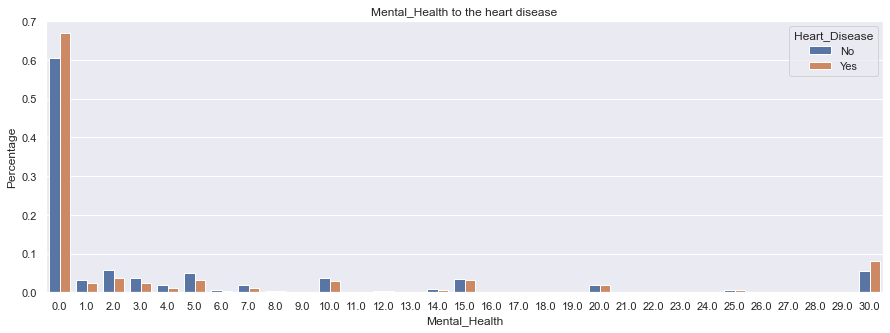

In [49]:
ph=df2.groupby('Heart_Disease')['Mental_Health'].value_counts(normalize=True).reset_index(name='Percentage')
p=sns.barplot(data=ph, x='Mental_Health', y='Percentage', hue='Heart_Disease')
p.set_title('Mental_Health to the heart disease')

>We notice that mental health does not have that big effect on the risk of having heart disease

In [50]:
#4-Sleeping time
#Question:On average, how many hours of sleep do you get in a 24-hour period?
df2['Sleep_Time'].unique()

array([ 5.,  7.,  8.,  6.,  4.,  9., 10.,  3., 11.])

In [51]:
df2['Sleep_Time'].unique().sum()

63.0

In [52]:
df2.groupby('Heart_Disease')['Sleep_Time'].mean()

Heart_Disease
No     7.032791
Yes    7.039077
Name: Sleep_Time, dtype: float64

Text(0.5, 1.0, 'Sleep_Time to the heart disease')

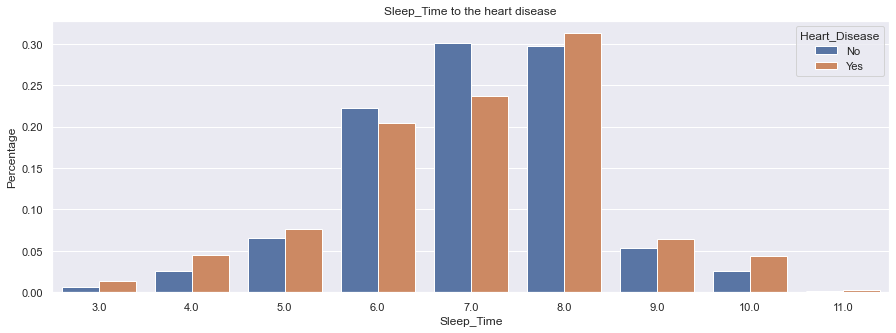

In [67]:
ph=df2.groupby('Heart_Disease')['Sleep_Time'].value_counts(normalize=True).reset_index(name='Percentage')
p=sns.barplot(data=ph, x='Sleep_Time', y='Percentage', hue='Heart_Disease')
p.set_title('Sleep_Time to the heart disease')


>we notice that heart Disease have higher percentages in people that sleep less than 6 hours or more than 8 hours.

>categorigal feature 

In [53]:
categorical.columns[1:]

Index(['Smoking', 'Alcohol_Drinking', 'Stroke', 'Diff_Walking', 'Sex',
       'Age_Category', 'Race', 'Diabetic', 'Physical_Activity', 'Gen_Health',
       'Asthma', 'Kidney_Disease', 'Skin_Cancer'],
      dtype='object')

we can seperate them to:
>uncontrolled factors that can increase the risk of getting heart disease (age, race, Sex)
>>some habits & activities that can be controlled (Smoking, Physical_Activity, Alchohol_Drinking, Gen_Health)
>>>other diseases (Stroke, Diff_Walking, Diabetic, Asthma, Kidney_Disease, Skin_Cancer)

>Factor can not be controlled

In [54]:
#Age
df2['Age_Category'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [55]:
df2.groupby('Heart_Disease')['Age_Category'].value_counts()

Heart_Disease  Age_Category
No             60-64           26021
               65-69           25739
               55-59           23751
               70-74           22974
               50-54           21018
               18-24           18906
               45-49           18722
               40-44           18303
               35-39           18284
               30-34           17005
               80 or older     16884
               75-79           15804
               25-29           15529
Yes            80 or older      5238
               70-74            4690
               65-69            3945
               75-79            3898
               60-64            3213
               55-59            2131
               50-54            1329
               45-49             712
               40-44             470
               35-39             286
               30-34             219
               25-29             129
               18-24             124
Name: Age_

<AxesSubplot:xlabel='Age_Category', ylabel='count'>

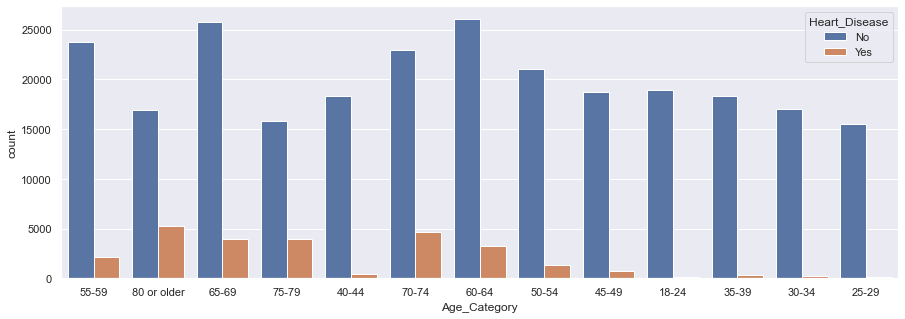

In [56]:
sns.countplot(data=df2,x=df2['Age_Category'],hue=df2['Heart_Disease'],order=['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],hue_order=['No','Yes'])

>get the average of age category in a new ccolumn Age

In [57]:
age={'55-59':57, '80 or older':80, '65-69':67, '75-79':77, '40-44':42, '70-74':72,
       '60-64':62, '50-54':52, '45-49':47, '18-24':21, '35-39':37, '30-34':32, '25-29':27}
df2['Age']=df2['Age_Category'].replace(age)

C:\Users\danac\AppData\Local\Temp\ipykernel_10040\3189854326.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df2['Age']

0         57
1         80
2         67
3         77
4         42
          ..
319789    21
319790    62
319791    37
319792    47
319794    80
Name: Age, Length: 285324, dtype: int64

Text(0.5, 1.0, 'Age to the heart disease')

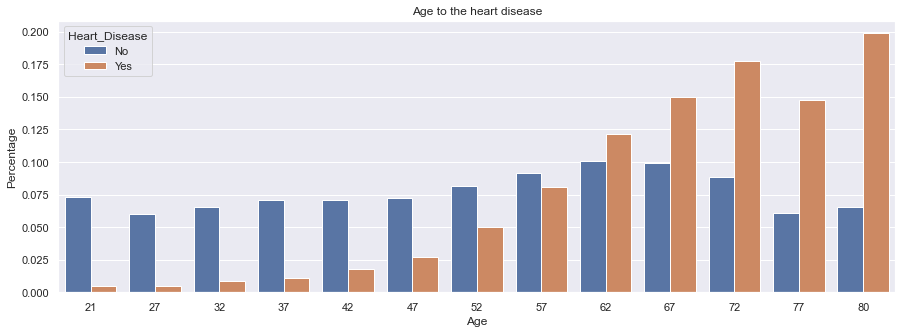

In [59]:
ph=df2.groupby('Heart_Disease')['Age'].value_counts(normalize=True).reset_index(name='Percentage')
p=sns.barplot(data=ph, x='Age', y='Percentage', hue='Heart_Disease')
p.set_title('Age to the heart disease')

>When people get older the risk of heart disease increase

In [60]:
Age_outliers=detect_outliers(df2,0,['Age'])
len(Age_outliers)

0

<AxesSubplot:xlabel='Age'>

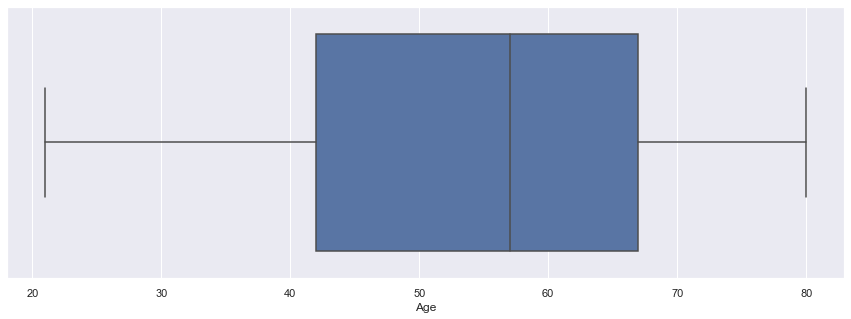

In [61]:
sns.boxplot(data=df2,x='Age')

In [62]:
df2.drop('Age_Category',axis=1,inplace=True)

C:\Users\danac\AppData\Local\Temp\ipykernel_10040\1570687736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285324 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Heart_Disease      285324 non-null  object  
 1   Smoking            285324 non-null  object  
 2   Alcohol_Drinking   285324 non-null  object  
 3   Stroke             285324 non-null  object  
 4   Physical_Health    285324 non-null  float64 
 5   Mental_Health      285324 non-null  float64 
 6   Diff_Walking       285324 non-null  object  
 7   Sex                285324 non-null  object  
 8   Race               285324 non-null  object  
 9   Diabetic           285324 non-null  object  
 10  Physical_Activity  285324 non-null  object  
 11  Gen_Health         285324 non-null  object  
 12  Sleep_Time         285324 non-null  float64 
 13  Asthma             285324 non-null  object  
 14  Kidney_Disease     285324 non-null  object  
 15  Skin_Cancer        285324 non-null

In [64]:
#Race
df2['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [65]:
df2.groupby('Heart_Disease')['Race'].value_counts()

Heart_Disease  Race                          
No             White                             191804
               Hispanic                           24965
               Black                              20261
               Other                               9806
               Asian                               7575
               American Indian/Alaskan Native      4529
Yes            White                              21731
               Black                               1637
               Hispanic                            1394
               Other                                847
               American Indian/Alaskan Native       517
               Asian                                258
Name: Race, dtype: int64

>We notice that most people in our data are White people

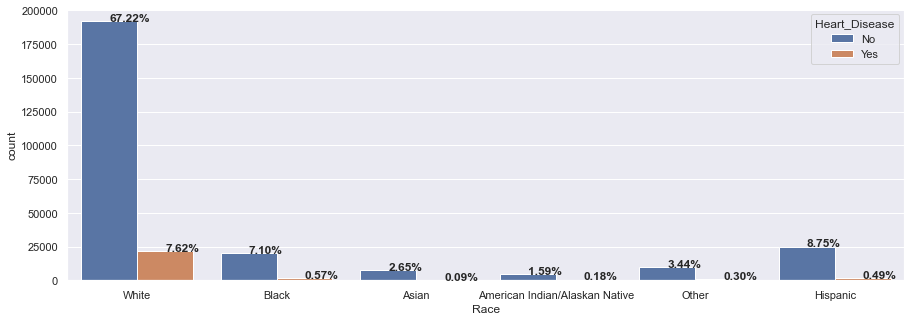

In [66]:
ax=sns.countplot(data=df2,x='Race',hue='Heart_Disease')
for y in ax.patches:
    height=y.get_height()
    width=y.get_width()
    percent=height/len(df2)
    ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

In [67]:
df2_plot = df2[df2['Heart_Disease']=='Yes']
fig = px.pie(values=df2_plot['Race'].value_counts(normalize=True).values, names=df2_plot.Race.value_counts().index)
fig.show()

>We notice that the white race is more susceptible (sensitive) to heart disease than other races

In [68]:
#Sex
df2.groupby('Heart_Disease')['Sex'].value_counts()

Heart_Disease  Sex   
No             Female    141001
               Male      117939
Yes            Male       15555
               Female     10829
Name: Sex, dtype: int64

>We notice that ingeneral our dataset contain more female and male are more prone to heart disease

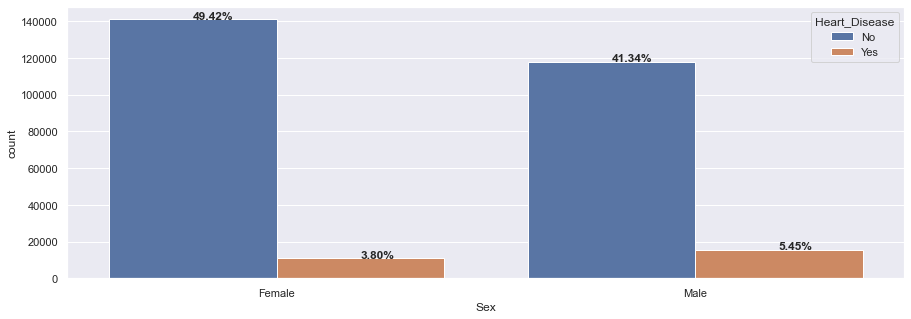

In [69]:
ax=sns.countplot(data=df2,x='Sex',hue='Heart_Disease')
for y in ax.patches:
    height=y.get_height()
    width=y.get_width()
    percent=height/len(df2)
    ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

In [70]:
df2_plot = df2[df2['Heart_Disease']=='Yes']
fig = px.pie(values=df2_plot['Sex'].value_counts().values, names=df2_plot.Sex.value_counts().index)
fig.show()

>>some habits & activities that can be controlled

In [71]:
#Smoking
#Q:Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
df2.groupby('Heart_Disease')['Smoking'].value_counts()

Heart_Disease  Smoking
No             No         152600
               Yes        106340
Yes            Yes         15423
               No          10961
Name: Smoking, dtype: int64

In [72]:
fig = px.pie(values=df2_plot['Smoking'].value_counts().values, names=df2_plot.Smoking.value_counts().index)
fig.show()

>Smoking can increase the risk of having heart disease

In [73]:
#Alcohol_Drinking
#Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
df2.groupby('Heart_Disease')['Alcohol_Drinking'].value_counts()


Heart_Disease  Alcohol_Drinking
No             No                  238919
               Yes                  20021
Yes            No                   25288
               Yes                   1096
Name: Alcohol_Drinking, dtype: int64

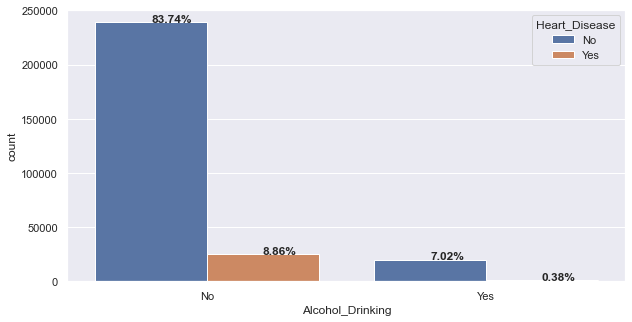

In [74]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df2,x='Alcohol_Drinking',hue='Heart_Disease')
for y in ax.patches:
    height=y.get_height()
    width=y.get_width()
    percent=height/len(df2)
    ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')


In [75]:
fig = px.pie(values=df2_plot['Alcohol_Drinking'].value_counts().values, names=df2_plot.Alcohol_Drinking.value_counts().index)
fig.show()

>We notice that drinking alcohol not a factor of heart disease

In [76]:
#Physical_Activity
#Adults who doing physical activity or exercise during the past 30 days other than their regular job.
df2.groupby('Heart_Disease')['Physical_Activity'].value_counts()

Heart_Disease  Physical_Activity
No             Yes                  199511
               No                    59429
Yes            Yes                   16931
               No                     9453
Name: Physical_Activity, dtype: int64

In [77]:
df2.groupby('Heart_Disease').Physical_Activity.value_counts().reset_index(name='Count').Count

0    199511
1     59429
2     16931
3      9453
Name: Count, dtype: int64

Text(0.5, 1.0, 'Individuals With Heart Disease')

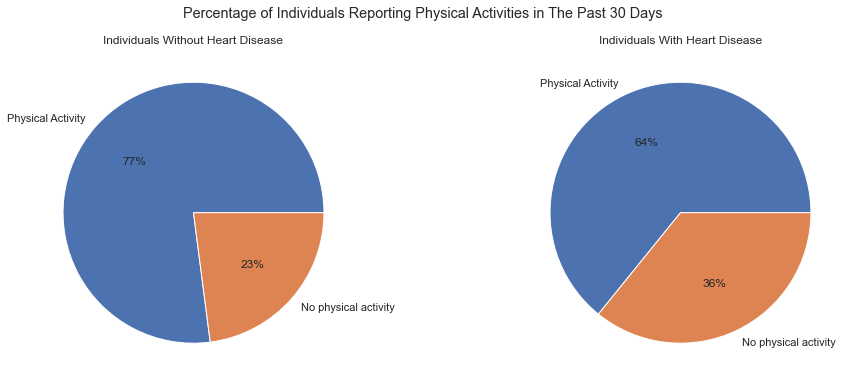

In [78]:
x=df2.groupby('Heart_Disease').Physical_Activity.value_counts().reset_index(name='Count').Count
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("Percentage of Individuals Reporting Physical Activities in The Past 30 Days")

ax1.pie([x[0], x[1]], labels = ['Physical Activity', 'No physical activity'], autopct='%.0f%%')

ax1.set_title("Individuals Without Heart Disease")

ax2.pie([x[2], x[3]], labels = ['Physical Activity', 'No physical activity'],autopct='%.0f%%')
ax2.set_title("Individuals With Heart Disease")

>It is obvious that not managing the physical activity can increase the risk of having heat disease

>>Relations with general health

In [79]:
#Gen_Health & What was the response of people who have these habits (Smoking,Alcohol_Drinking,Physical_Activity) about how their general health is?
#Would you say that in general your health is Very good, Fair, Good', 'Poor or Excellent
df2['Gen_Health'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [80]:
df2.groupby('Heart_Disease')['Gen_Health'].value_counts()

Heart_Disease  Gen_Health
No             Very good     92820
               Good          79041
               Excellent     53293
               Fair          26822
               Poor           6964
Yes            Good           9275
               Fair           6836
               Very good      5217
               Poor           3598
               Excellent      1458
Name: Gen_Health, dtype: int64

In [81]:
df2.groupby('Heart_Disease')['Gen_Health'].value_counts().reset_index(name='Count').Count

0    92820
1    79041
2    53293
3    26822
4     6964
5     9275
6     6836
7     5217
8     3598
9     1458
Name: Count, dtype: int64

Text(0.5, 1.0, 'Individuals With Heart Disease')

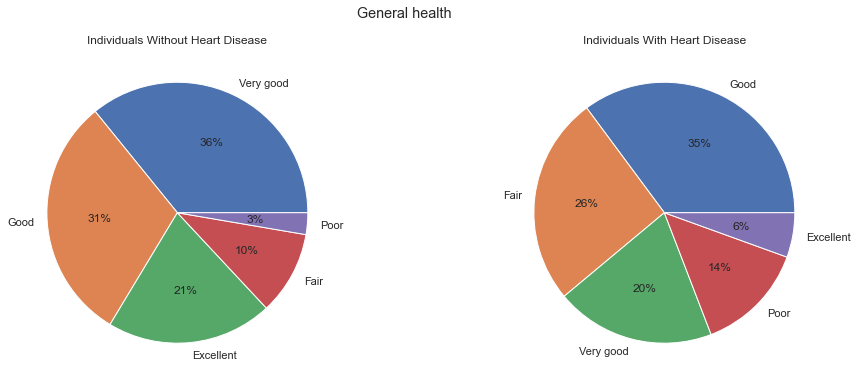

In [82]:
x=df2.groupby('Heart_Disease')['Gen_Health'].value_counts().reset_index(name='Count').Count
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("General health ")

ax1.pie([x[0], x[1], x[2], x[3], x[4]], labels = ['Very good','Good','Excellent','Fair','Poor'], autopct='%.0f%%')

ax1.set_title("Individuals Without Heart Disease")

ax2.pie([x[5], x[6], x[7],x[8],x[9]], labels = ['Good','Fair','Very good','Poor','Excellent'],autopct='%.0f%%')
ax2.set_title("Individuals With Heart Disease")

>we notice that total percentage of general health in individuals without heart disease (Very good+good+Excellent) = 87%
>>mean that people without heart disease in general are in good health

>Are smokers satisfied with their general health?

In [83]:
df2.groupby('Smoking')['Gen_Health'].value_counts()

Smoking  Gen_Health
No       Very good     59796
         Good          47650
         Excellent     37003
         Fair          15266
         Poor           3846
Yes      Good          40666
         Very good     38241
         Fair          18392
         Excellent     17748
         Poor           6716
Name: Gen_Health, dtype: int64

Text(0.5, 1.0, 'Individuals With Smoking')

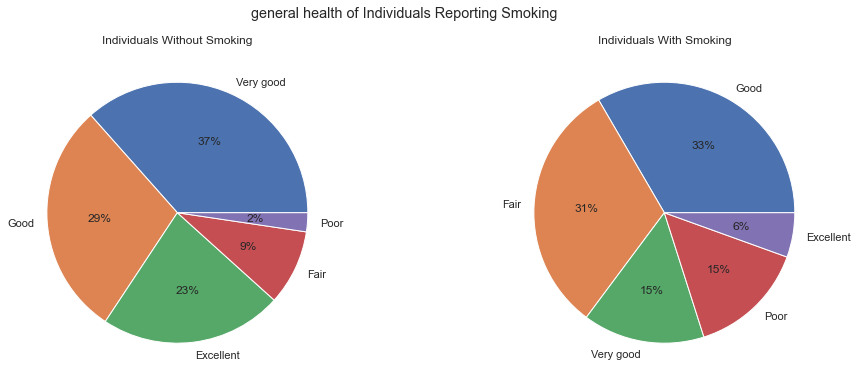

In [84]:
x=df2.groupby('Smoking')['Gen_Health'].value_counts().reset_index(name='Count').Count
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("general health of Individuals Reporting Smoking ")

ax1.pie([x[0], x[1], x[2], x[3], x[4]], labels = ['Very good','Good','Excellent','Fair','Poor'], autopct='%.0f%%')

ax1.set_title("Individuals Without Smoking")

ax2.pie([x[5], x[6], x[7],x[8],x[9]], labels = ['Good','Fair','Very good','Poor','Excellent'],autopct='%.0f%%')
ax2.set_title("Individuals With Smoking")

>people who are smoking said that they have good health which is odd(people who said that their health Good+Excellent+very good= 57%)

>What did people who drink say about their general health?

In [85]:
df2.groupby('Alcohol_Drinking')['Gen_Health'].value_counts()

Alcohol_Drinking  Gen_Health
No                Very good     90018
                  Good          82380
                  Excellent     49898
                  Fair          31824
                  Poor          10087
Yes               Very good      8019
                  Good           5936
                  Excellent      4853
                  Fair           1834
                  Poor            475
Name: Gen_Health, dtype: int64

Text(0.5, 1.0, 'Individuals With Alcohol_Drinking')

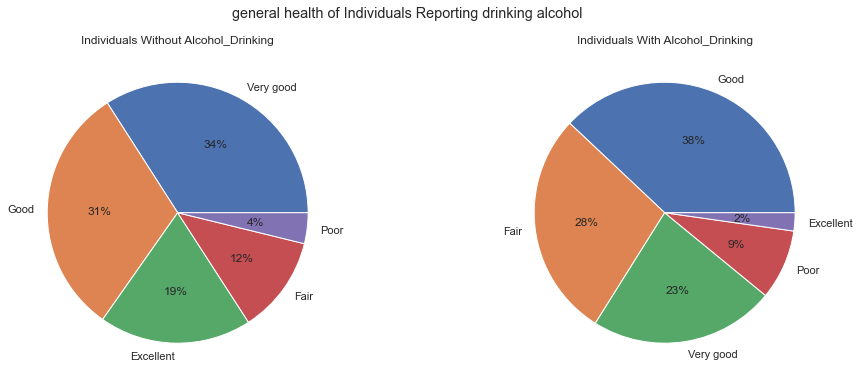

In [86]:
x=df2.groupby('Alcohol_Drinking')['Gen_Health'].value_counts().reset_index(name='Count').Count
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("general health of Individuals Reporting drinking alcohol")

ax1.pie([x[0], x[1], x[2], x[3], x[4]], labels = ['Very good','Good','Excellent','Fair','Poor'], autopct='%.0f%%')

ax1.set_title("Individuals Without Alcohol_Drinking")

ax2.pie([x[5], x[6], x[7],x[8],x[9]], labels = ['Good','Fair','Very good','Poor','Excellent'],autopct='%.0f%%')
ax2.set_title("Individuals With Alcohol_Drinking")

>high percentage (63%) of people who drink feel that their general health is good, very good or Excellent

>What do people who do physical exercise feel about their general health?

In [87]:
df2.groupby('Physical_Activity')['Gen_Health'].value_counts()

Physical_Activity  Gen_Health
No                 Good          24464
                   Very good     16384
                   Fair          14479
                   Excellent      7237
                   Poor           6318
Yes                Very good     81653
                   Good          63852
                   Excellent     47514
                   Fair          19179
                   Poor           4244
Name: Gen_Health, dtype: int64

Text(0.5, 1.0, 'Individuals Without Physical Activity')

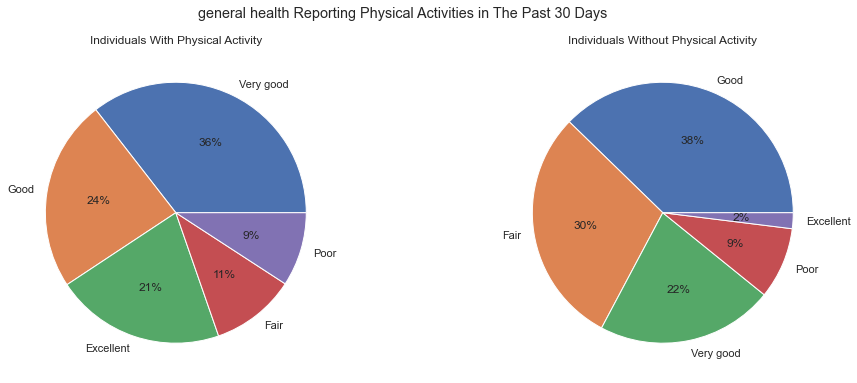

In [88]:
x=df2.groupby('Physical_Activity')['Gen_Health'].value_counts().reset_index(name='Count').Count
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
fig.suptitle("general health Reporting Physical Activities in The Past 30 Days ")

ax1.pie([x[0], x[1], x[2], x[3], x[4]], labels = ['Very good','Good','Excellent','Fair','Poor'], autopct='%.0f%%')

ax1.set_title("Individuals With Physical Activity")

ax2.pie([x[5], x[6], x[7],x[8],x[9]], labels = ['Good','Fair','Very good','Poor','Excellent'],autopct='%.0f%%')
ax2.set_title("Individuals Without Physical Activity")

>From our database, 62% of people who do not do physical activities feel that their general health is good,very good or excellent

## Heart disease and other diseases

In [ ]:
#other diseases (Stroke, Diff_Walking, Diabetic, Asthma, Kidney_Disease, Skin_Cancer)

In [89]:
for i in ['Asthma','Kidney_Disease','Stroke','Skin_Cancer','Diff_Walking']:
    x=df2.groupby('Heart_Disease')[i].value_counts()
    print('\n','*'*80,'\n',x)


 ******************************************************************************** 
 Heart_Disease  Asthma
No             No        222059
               Yes        36881
Yes            No         21654
               Yes         4730
Name: Asthma, dtype: int64

 ******************************************************************************** 
 Heart_Disease  Kidney_Disease
No             No                250863
               Yes                 8077
Yes            No                 23077
               Yes                 3307
Name: Kidney_Disease, dtype: int64

 ******************************************************************************** 
 Heart_Disease  Stroke
No             No        251509
               Yes         7431
Yes            No         22231
               Yes         4153
Name: Stroke, dtype: int64

 ******************************************************************************** 
 Heart_Disease  Skin_Cancer
No             No             235371
               Ye

>Does kidney,Asthma,stroke Skin Cancer and Diff_Walking disease coincide with heart disease?

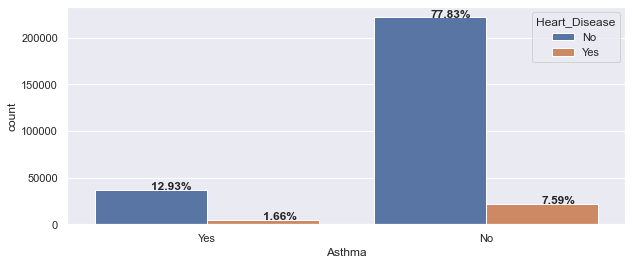

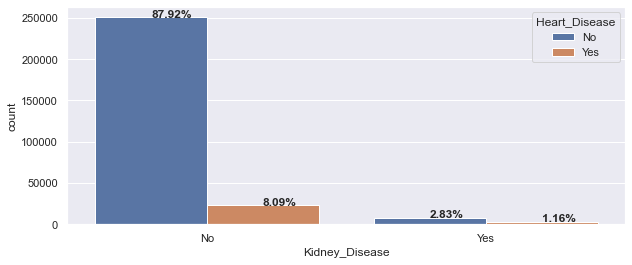

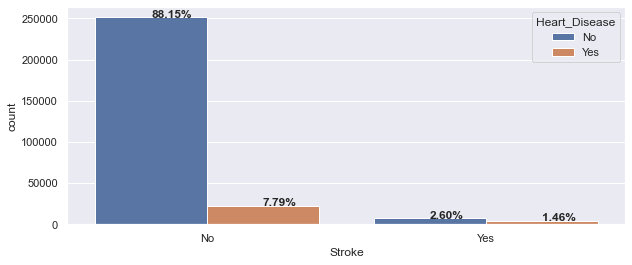

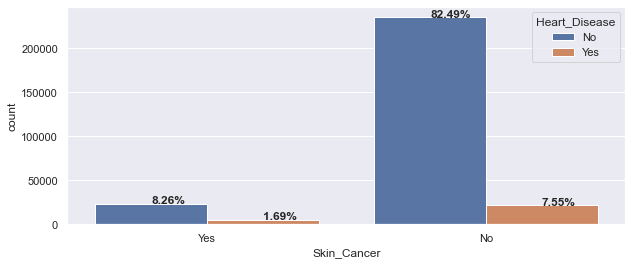

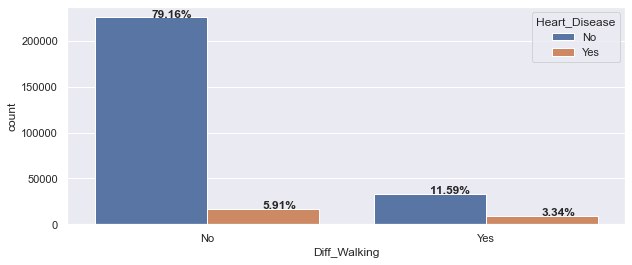

In [90]:
for i in ['Asthma','Kidney_Disease','Stroke','Skin_Cancer','Diff_Walking']:
    fig, (ax1) = plt.subplots(nrows=1, figsize=(10, 4))
    ax=sns.countplot(data=df2, x=i, ax=ax1,hue='Heart_Disease')
    for y in ax.patches:
        height=y.get_height()
        width=y.get_width()
        percent=height/len(df2)
        ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')
    

### insights from plot above
>causes for Kidney Diseases and Stroke  are the same causes for Heart Disease.

>People with difficulty walking tend to have a higher chance of getting heart disease.

In [91]:
df2['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

Having prediabetes(borderline) means your blood glucose (sugar) levels are higher than normal—but not high enough to be diagnosed as diabetes.

In [92]:
df2.groupby('Heart_Disease')['Diabetic'].value_counts()

Heart_Disease  Diabetic               
No             No                         219954
               Yes                         30668
               No, borderline diabetes      5895
               Yes (during pregnancy)       2423
Yes            No                          16900
               Yes                          8609
               No, borderline diabetes       770
               Yes (during pregnancy)        105
Name: Diabetic, dtype: int64

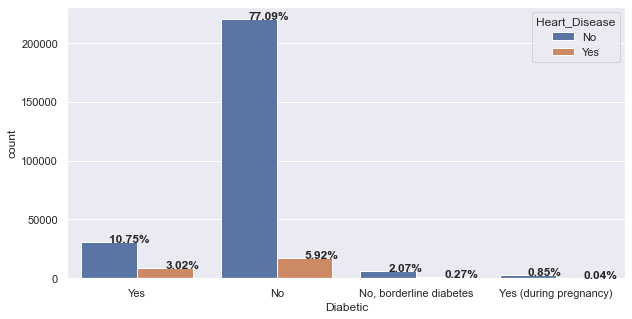

In [93]:
ax=sns.countplot(data=df2,x='Diabetic',hue='Heart_Disease')
for y in ax.patches:
        height=y.get_height()
        width=y.get_width()
        percent=height/len(df2)
        ax.text(x=y.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, weight='bold')

>Asthma, kidney disease, skin cancer and diabetes contribute to heart disease. However, asthma only gives a small contribution.

In [110]:
df2.corr()

Physical_Health  Mental_Health  Sleep_Time       Age
Physical_Health         1.000000       0.266348   -0.097011  0.115999
Mental_Health           0.266348       1.000000   -0.154821 -0.162544
Sleep_Time             -0.097011      -0.154821    1.000000  0.106166
Age                     0.115999      -0.162544    0.106166  1.000000

<AxesSubplot:>

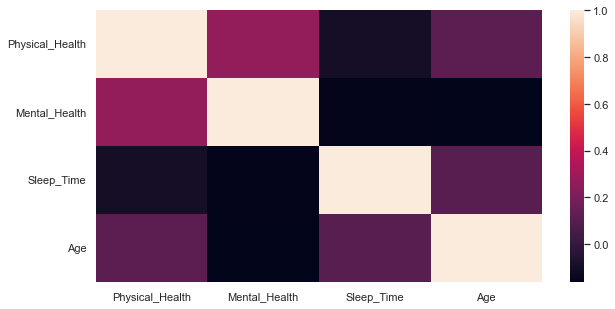

In [111]:
sns.heatmap(df2.corr())

# Insights summary

>factor has the most impact on a person's health and chance of getting a Heart Disease:

In [ ]:
#1-BMI contributes to heart disease. People with BMI  greater than 25 tend to have a higher chance of getting heart disease.
#2-Smoking habits contributes to heart disease. 
#3-On the other hand, the data shows that alcoholic drinking habits does not contribute to heart disease, which is odd.
#4-Stroke contributes to heart disease.
#5-People with difficulty walking tend to have a higher chance of getting heart disease.
#6-On the other hand, the data shows that the number of mental health problems within the same interval only gives a small contribution to heart diseas.
#7-People with difficulty walking not tend to have a higher chance of getting heart disease.
#8-People older than 60 tend to have heart disease than those younger than 60.
#9-stroke, kidney disease, and diabetes contribute to heart disease. However, asthma and skin cancer  give a small contribution.
#10-In terms of genders, males tend to have a higher chance of heart disease than females.
#11-The number of physical activity other than working in the past 30 days decreases the chance of getting heart disease. The same conclusion applies for the general health conditions.
#12-The amount of sleep time in a day does not seem to give a considerable contribution to heart disease. However, people without heart disease commonly have a better sleep time, that is about 6 to 8 hours in a day.

In [209]:
df2.describe()

Physical_Health  Mental_Health     Sleep_Time            Age
count    285324.000000  285324.000000  285324.000000  285324.000000
mean          3.635775       4.223676       7.033373      54.253389
std           8.169700       8.174509       1.276385      17.861609
min           0.000000       0.000000       3.000000      21.000000
25%           0.000000       0.000000       6.000000      42.000000
50%           0.000000       0.000000       7.000000      57.000000
75%           2.000000       4.000000       8.000000      67.000000
max          30.000000      30.000000      11.000000      80.000000

## Cleaning_Dataset

>cleaning dataset to make it ready for modeling

In [215]:
df2.head(3)

Heart_Disease Smoking Alcohol_Drinking Stroke  Physical_Health  \
0            No     Yes               No     No              3.0   
1            No      No               No    Yes              0.0   
2            No     Yes               No     No             20.0   

   Mental_Health Diff_Walking     Sex   Race Diabetic Physical_Activity  \
0           30.0           No  Female  White      Yes               Yes   
1            0.0           No  Female  White       No               Yes   
2           30.0           No    Male  White      Yes               Yes   

  Gen_Health  Sleep_Time Asthma Kidney_Disease Skin_Cancer  \
0  Very good         5.0    Yes             No         Yes   
1  Very good         7.0     No             No          No   
2       Fair         8.0    Yes             No          No   

                         BMI_Category  Age  
0            Underweight (BMI < 18.5)   57  
1  Normal weight (18.5 <= BMI < 25.0)   80  
2     Overweight (25.0 <= BMI < 30.0)   67

In [216]:
#yes or no columns
cols_yes_no_values=['Heart_Disease','Smoking','Alcohol_Drinking','Stroke','Diff_Walking','Physical_Activity',
                   'Asthma','Kidney_Disease' ,'Skin_Cancer']
for i in cols_yes_no_values:
    df2[i]=pd.get_dummies(df2[i],drop_first=True)
df2.head()

C:\Users\danac\AppData\Local\Temp\ipykernel_17324\1611425802.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Heart_Disease  Smoking  Alcohol_Drinking  Stroke  Physical_Health  \
0              0        1                 0       0              3.0   
1              0        0                 0       1              0.0   
2              0        1                 0       0             20.0   
3              0        0                 0       0              0.0   
4              0        0                 0       0             28.0   

   Mental_Health  Diff_Walking     Sex   Race Diabetic  Physical_Activity  \
0           30.0             0  Female  White      Yes                  1   
1            0.0             0  Female  White       No                  1   
2           30.0             0    Male  White      Yes                  1   
3            0.0             0  Female  White       No                  0   
4            0.0             1  Female  White       No                  1   

  Gen_Health  Sleep_Time  Asthma  Kidney_Disease  Skin_Cancer  \
0  Very good         5.0       1               0            1   
1  Very good         7.0       0               0            0   
2       Fair         8.0       1               0            0   
3       Good         6.0       0               0            1   
4  Very good         8.0       0               0            0   

                         BMI_Category  Age  
0            Underweight (BMI < 18.5)   57  
1  Normal weight (18.5 <= BMI < 25.0)   80  
2     Overweight (25.0 <= BMI < 30.0)   67  
3  Normal weight (18.5 <= BMI < 25.0)   77  
4  Normal weight (18.5 <= BMI < 25.0)   42

In [224]:
#Turn the Sex column into numeric value
sex = {'Female':0, 'Male':1}
df2['Sex'] = df2['Sex'].replace(sex)

C:\Users\danac\AppData\Local\Temp\ipykernel_17324\38742346.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
#Change BMI_Category coloum into numeric value
df2=pd.get_dummies(df2,columns=['BMI_Category'],drop_first=True)

In [226]:
#Change age Category into numeric values
df2=pd.get_dummies(df2,columns=['Gen_Health'],drop_first=True)

In [227]:
#Change Diabetic into numeric value
#Diabetic have 4 values (Yes,No,No borderline diabetes,Yes(during pregnancy))
df2=pd.get_dummies(df2,columns=['Diabetic'],drop_first=True)

In [228]:
#Change Race Value
df2=pd.get_dummies(df2,columns=['Race'],drop_first=True)

In [229]:
df2

Heart_Disease  Smoking  Alcohol_Drinking  Stroke  Physical_Health  \
0                   0        1                 0       0              3.0   
1                   0        0                 0       1              0.0   
2                   0        1                 0       0             20.0   
3                   0        0                 0       0              0.0   
4                   0        0                 0       0             28.0   
...               ...      ...               ...     ...              ...   
319789              0        0                 0       0              0.0   
319790              1        1                 0       0              7.0   
319791              0        1                 0       0              0.0   
319792              0        0                 0       0              0.0   
319794              0        0                 0       0              0.0   

        Mental_Health  Diff_Walking  Sex  Physical_Activity  Sleep_Time  ...  \
0                30.0             0    0                  1         5.0  ...   
1                 0.0             0    0                  1         7.0  ...   
2                30.0             0    1                  1         8.0  ...   
3                 0.0             0    0                  0         6.0  ...   
4                 0.0             1    0                  1         8.0  ...   
...               ...           ...  ...                ...         ...  ...   
319789            0.0             0    0                  1         8.0  ...   
319790            0.0             1    1                  0         6.0  ...   
319791            0.0             0    1                  1         5.0  ...   
319792            0.0             0    0                  1         6.0  ...   
319794            0.0             0    0                  1         8.0  ...   

        Gen_Health_Poor  Gen_Health_Very good  \
0                     0                     1   
1                     0                     1   
2                     0                     0   
3                     0                     0   
4                     0                     1   
...                 ...                   ...   
319789                0                     0   
319790                0                     0   
319791                0                     1   
319792                0                     0   
319794                0                     0   

        Diabetic_No, borderline diabetes  Diabetic_Yes  \
0                                      0             1   
1                                      0             0   
2                                      0             1   
3                                      0             0   
4                                      0             0   
...                                  ...           ...   
319789                                 0             0   
319790                                 0             1   
319791                                 0             0   
319792                                 0             0   
319794                                 0             0   

        Diabetic_Yes (during pregnancy)  Race_Asian  Race_Black  \
0                                     0           0           0   
1                                     0           0           0   
2                                     0           0           0   
3                                     0           0           0   
4                                     0           0           0   
...                                 ...         ...         ...   
319789                                0           0           0   
319790                                0           0           0   
319791                                0           0           0   
319792                                0           0           0   
319794                                0           0           0   

        Race_Hispanic  Race_Oth

In [231]:
df2.describe()

Heart_Disease        Smoking  Alcohol_Drinking         Stroke  \
count  285324.000000  285324.000000     285324.000000  285324.000000   
mean        0.092470       0.426753          0.074011       0.040599   
std         0.289689       0.494607          0.261789       0.197361   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.000000       0.000000          0.000000       0.000000   
50%         0.000000       0.000000          0.000000       0.000000   
75%         0.000000       1.000000          0.000000       0.000000   
max         1.000000       1.000000          1.000000       1.000000   

       Physical_Health  Mental_Health   Diff_Walking            Sex  \
count    285324.000000  285324.000000  285324.000000  285324.000000   
mean          3.635775       4.223676       0.149304       0.467868   
std           8.169700       8.174509       0.356388       0.498967   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           2.000000       4.000000       0.000000       1.000000   
max          30.000000      30.000000       1.000000       1.000000   

       Physical_Activity     Sleep_Time  ...  Gen_Health_Poor  \
count      285324.000000  285324.000000  ...    285324.000000   
mean            0.758583       7.033373  ...         0.037018   
std             0.427943       1.276385  ...         0.188805   
min             0.000000       3.000000  ...         0.000000   
25%             1.000000       6.000000  ...         0.000000   
50%             1.000000       7.000000  ...         0.000000   
75%             1.000000       8.000000  ...         0.000000   
max             1.000000      11.000000  ...         1.000000   

       Gen_Health_Very good  Diabetic_No, borderline diabetes   Diabetic_Yes  \
count         285324.000000                     285324.000000  285324.000000   
mean               0.343599                          0.023359       0.137658   
std                0.474910                          0.151042       0.344541   
min                0.000000                          0.000000       0.000000   
25%                0.000000                          0.000000       0.000000   
50%                0.000000                          0.000000       0.000000   
75%                1.000000                          0.000000       0.000000   
max                1.000000                          1.000000       1.000000   

       Diabetic_Yes (during pregnancy)     Race_Asian     Race_Black  \
count                     285324.00000  285324.000000  285324.000000   
mean                           0.00886       0.027453       0.076748   
std                            0.09371       0.163400       0.266191   
min                            0.00000       0.000000       0.000000   
25%                            0.00000       0.000000       0.000000   
50%                            0.00000       0.000000       0.000000   
75%                            0.00000       0.000000       0.000000   
max                            1.00000       1.000000       1.000000   

       Race_Hispanic     Race_Other     Race_White  
count  285324.000000  285324.000000  285324.000000  
mean        0.092383       0.037337       0.748395  
std         0.289566       0.189585       0.433936  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       1.000000  
75%         0.000000       0.000000       1.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 30 columns]

In [233]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285324 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Heart_Disease                                    285324 non-null  uint8  
 1   Smoking                                          285324 non-null  uint8  
 2   Alcohol_Drinking                                 285324 non-null  uint8  
 3   Stroke                                           285324 non-null  uint8  
 4   Physical_Health                                  285324 non-null  float64
 5   Mental_Health                                    285324 non-null  float64
 6   Diff_Walking                                     285324 non-null  uint8  
 7   Sex                                              285324 non-null  int64  
 8   Physical_Activity                                285324 non-null  uint8  
 9   Sleep_Time     

In [234]:
df2.corr()

Heart_Disease   Smoking  \
Heart_Disease                                         1.000000  0.101843   
Smoking                                               0.101843  1.000000   
Alcohol_Drinking                                     -0.039592  0.108440   
Stroke                                                0.188920  0.056889   
Physical_Health                                       0.158125  0.105735   
Mental_Health                                         0.012063  0.073056   
Diff_Walking                                          0.189792  0.111927   
Sex                                                   0.077852  0.088474   
Physical_Activity                                    -0.087173 -0.084686   
Sleep_Time                                            0.001427 -0.040064   
Asthma                                                0.030241  0.012676   
Kidney_Disease                                        0.139350  0.029392   
Skin_Cancer                                           0.089278  0.028662   
Age                                                   0.241421  0.130484   
BMI_Category_Normal weight (18.5 <= BMI < 25.0)      -0.047581 -0.026117   
BMI_Category_Overweight (25.0 <= BMI < 30.0)          0.013145  0.014890   
BMI_Category_Obese (30.0 <= BMI < 35.0)               0.021974  0.008578   
BMI_Category_Extremly Obese (BMI >= 35.0)             0.022439  0.001836   
Gen_Health_Fair                                       0.139662  0.088493   
Gen_Health_Good                                       0.029007  0.045628   
Gen_Health_Poor                                       0.167973  0.082892   
Gen_Health_Very good                                 -0.098042 -0.053665   
Diabetic_No, borderline diabetes                      0.012310  0.002425   
Diabetic_Yes                                          0.174768  0.048669   
Diabetic_Yes (during pregnancy)                      -0.016624 -0.008305   
Race_Asian                                           -0.034527 -0.066427   
Race_Black                                           -0.017631 -0.048317   
Race_Hispanic                                        -0.043596 -0.076174   
Race_Other                                           -0.008812  0.011654   
Race_White                                            0.055353  0.090372   

                                                 Alcohol_Drinking    Stroke  \
Heart_Disease                                           -0.039592  0.188920   
Smoking                                                  0.108440  0.056889   
Alcohol_Drinking                                         1.000000 -0.024783   
Stroke                                                  -0.024783  1.000000   
Physical_Health                                         -0.027402  0.126274   
Mental_Health                                            0.041271  0.034876   
Diff_Walking                                            -0.044697  0.164956   
Sex                                                      0.008345  0.000364   
Physical_Activity                                        0.028875 -0.070397   
Sleep_Time                                              -0.000585  0.001021   
Asthma                                                  -0.010494  0.030975   
Kidney_Disease                                          -0.033486  0.084637   
Skin_Cancer                                             -0.010788  0.043996   
Age                                                     -0.059864  0.142322   
BMI_Category_Normal weight (18.5 <= BMI < 25.0)          0.033295 -0.019717   
BMI_Category_Overweight (25.0 <= BMI < 30.0)             0.012021  0.005508   
BMI_Category_Obese (30.0 <= BMI < 35.0)                 -0.019134  0.008722   
BMI_Category_Extremly Obese (BMI >= 35.0)               -0.037948  0.006541   
Gen_Health_Fair                                         -0.027270  0.097582   
Gen_Health_Good                                         -0.017385  0.006431   
Gen_Health_Poor                  

<AxesSubplot:>

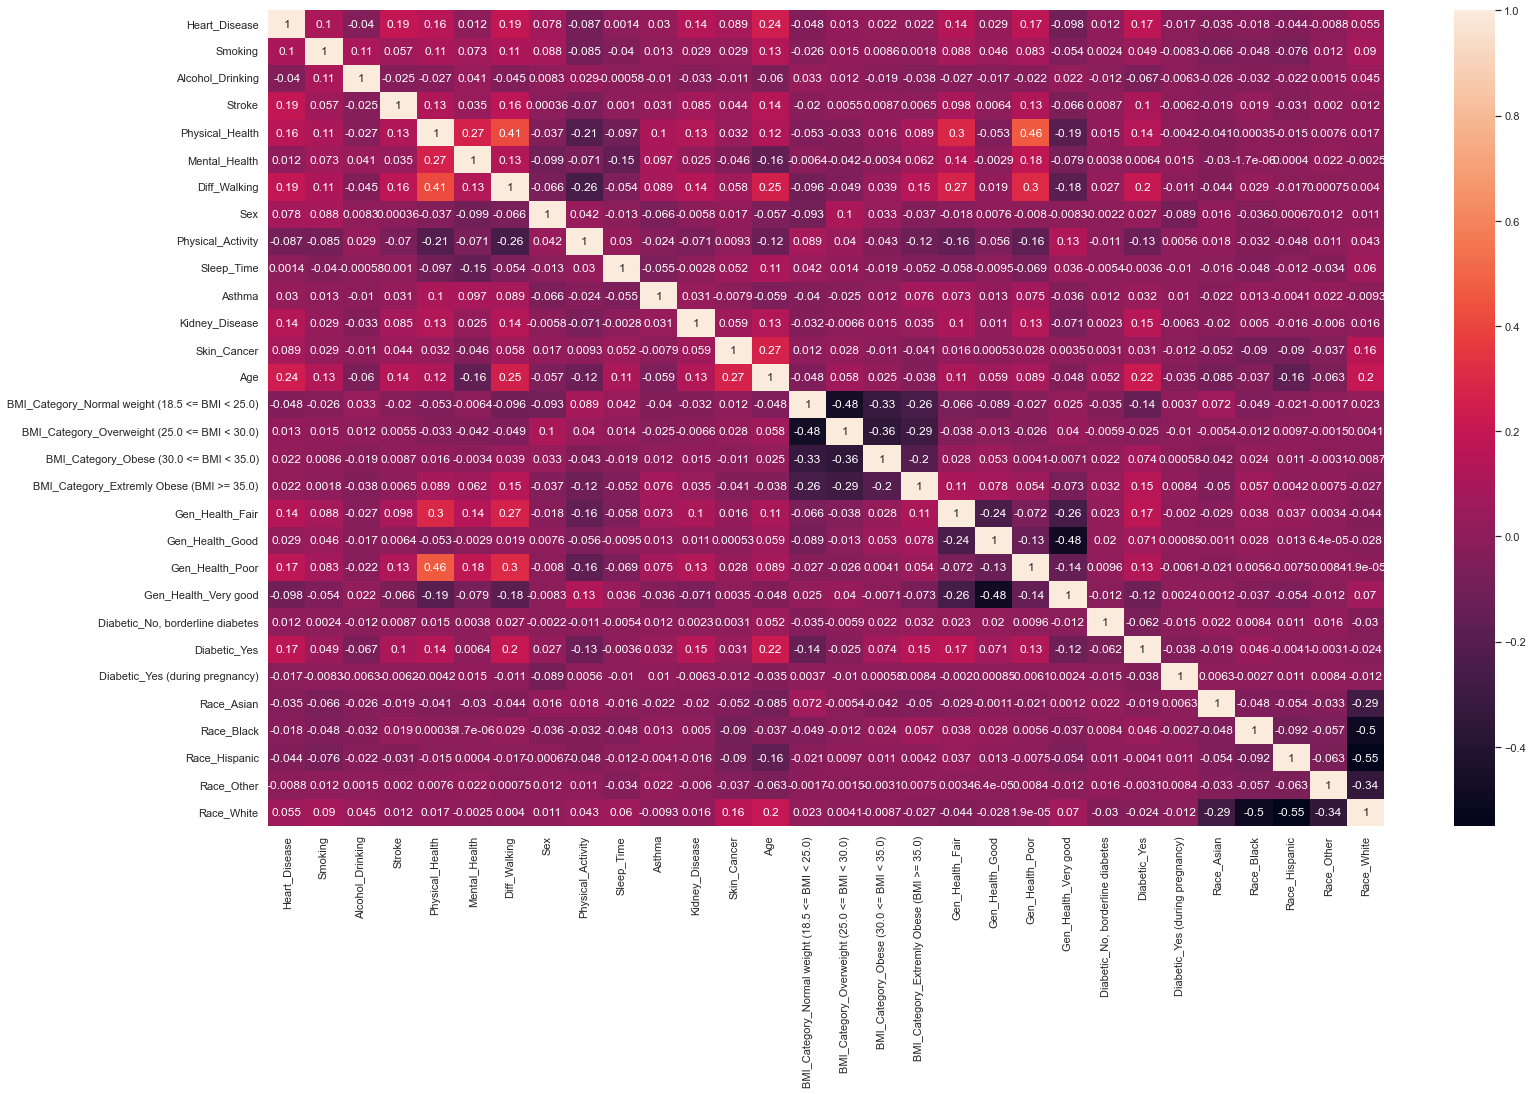

In [247]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(df2.corr(),annot=True)

### Train-Test Split

>Spliting data 

In [241]:
y=df2['Heart_Disease']
x=df2.drop('Heart_Disease',axis=1)

In [243]:
x.head() #Features to predect y

Smoking  Alcohol_Drinking  Stroke  Physical_Health  Mental_Health  \
0        1                 0       0              3.0           30.0   
1        0                 0       1              0.0            0.0   
2        1                 0       0             20.0           30.0   
3        0                 0       0              0.0            0.0   
4        0                 0       0             28.0            0.0   

   Diff_Walking  Sex  Physical_Activity  Sleep_Time  Asthma  ...  \
0             0    0                  1         5.0       1  ...   
1             0    0                  1         7.0       0  ...   
2             0    1                  1         8.0       1  ...   
3             0    0                  0         6.0       0  ...   
4             1    0                  1         8.0       0  ...   

   Gen_Health_Poor  Gen_Health_Very good  Diabetic_No, borderline diabetes  \
0                0                     1                                 0   
1                0                     1                                 0   
2                0                     0                                 0   
3                0                     0                                 0   
4                0                     1                                 0   

   Diabetic_Yes  Diabetic_Yes (during pregnancy)  Race_Asian  Race_Black  \
0             1                                0           0           0   
1             0                                0           0           0   
2             1                                0           0           0   
3             0                                0           0           0   
4             0                                0           0           0   

   Race_Hispanic  Race_Other  Race_White  
0              0           0           1  
1              0           0           1  
2              0           0           1  
3              0           0           1  
4              0           0           1  

[5 rows x 29 columns]

In [246]:
y #target

0         0
1         0
2         0
3         0
4         0
         ..
319789    0
319790    1
319791    0
319792    0
319794    0
Name: Heart_Disease, Length: 285324, dtype: uint8

In [249]:
# split the data into 80% train and 20% test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2) 

>We note that the classes are heavily unbalanced.

In [251]:
#Dealing with different scale numerical values to be in the same range
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_train=scaler.transform(x_test)

In [254]:
x_train

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

>Saving the cleaned data as csv

In [255]:
df2.to_csv('HeartDisease_cleaned.csv')